In [1]:
import csv
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

2023-08-14 11:22:14.432989: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-14 11:22:14.460913: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-14 11:22:14.461622: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-14 11:22:14.968404: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Provide Trainingsdata

In [2]:
# Lists to store data
timestamps = []
positions = []

# Read data from CSV file starting from the 2nd row
with open('velocity_data.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  # Skip header
    for row in csvreader:
        timestamps.append(float(row[0]))
        positions.append(float(row[5]))


print('timestamps: ', timestamps)
print('positions: ', positions)

timestamps:  [10339000000.0, 10355000000.0, 10375000000.0, 10395000000.0, 10415000000.0, 10435000000.0, 10455000000.0, 10475000000.0, 10495000000.0, 10538000000.0, 10538000000.0, 10586000000.0, 10586000000.0, 10634000000.0, 10634000000.0, 10678000000.0, 10678000000.0, 10678000000.0, 10722000000.0, 10722000000.0, 10735000000.0, 10755000000.0, 10802000000.0, 10802000000.0, 10846000000.0, 10846000000.0, 10894000000.0, 10894000000.0, 10938000000.0, 10938000000.0, 10938000000.0, 10982000000.0, 10982000000.0, 10995000000.0, 11015000000.0, 11058000000.0, 11058000000.0, 11102000000.0, 11102000000.0, 11150000000.0, 11150000000.0, 11194000000.0, 11194000000.0, 11238000000.0, 11238000000.0, 11238000000.0, 11286000000.0, 11286000000.0, 11295000000.0, 11315000000.0, 11358000000.0, 11358000000.0, 11402000000.0, 11402000000.0, 11446000000.0, 11446000000.0, 11490000000.0, 11490000000.0, 11534000000.0, 11534000000.0, 11577000000.0, 11577000000.0, 11577000000.0, 11621000000.0, 11621000000.0, 11635000000

In [3]:
# Scale the timestamps
def scale_timestamps(timestamps):
    min_timestamp = min(timestamps)
    max_timestamp = max(timestamps)
    scaled_timestamps = [(t - min_timestamp) / (max_timestamp - min_timestamp) for t in timestamps]
    return scaled_timestamps

# Scale timestamps
scaled_timestamps = scale_timestamps(timestamps)

print("Original timestamps:", timestamps)
print("Scaled timestamps:", scaled_timestamps)

Original timestamps: [10339000000.0, 10355000000.0, 10375000000.0, 10395000000.0, 10415000000.0, 10435000000.0, 10455000000.0, 10475000000.0, 10495000000.0, 10538000000.0, 10538000000.0, 10586000000.0, 10586000000.0, 10634000000.0, 10634000000.0, 10678000000.0, 10678000000.0, 10678000000.0, 10722000000.0, 10722000000.0, 10735000000.0, 10755000000.0, 10802000000.0, 10802000000.0, 10846000000.0, 10846000000.0, 10894000000.0, 10894000000.0, 10938000000.0, 10938000000.0, 10938000000.0, 10982000000.0, 10982000000.0, 10995000000.0, 11015000000.0, 11058000000.0, 11058000000.0, 11102000000.0, 11102000000.0, 11150000000.0, 11150000000.0, 11194000000.0, 11194000000.0, 11238000000.0, 11238000000.0, 11238000000.0, 11286000000.0, 11286000000.0, 11295000000.0, 11315000000.0, 11358000000.0, 11358000000.0, 11402000000.0, 11402000000.0, 11446000000.0, 11446000000.0, 11490000000.0, 11490000000.0, 11534000000.0, 11534000000.0, 11577000000.0, 11577000000.0, 11577000000.0, 11621000000.0, 11621000000.0, 116

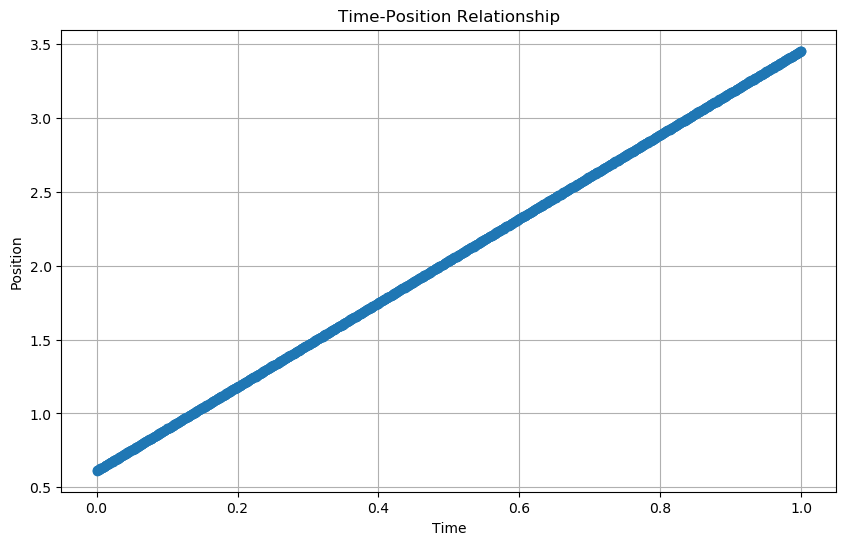

In [4]:
# Plot the Trainigsdata
plt.figure(figsize=(10, 6))
plt.plot(scaled_timestamps, positions, marker='o')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Time-Position Relationship')
plt.grid(True)
plt.show()

In [10]:
# Lists to store data
test_timestamps = []

# Read data from CSV file starting from the 2nd row
with open('test_data.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    next(csvreader)  # Skip header
    for row in csvreader:
        test_timestamps.append(float(row[0]))

print('timestamps: ', test_timestamps)

# Scale the timestamps
def scale_timestamps(timestamps):
    min_timestamp = min(timestamps)
    max_timestamp = max(timestamps)
    scaled_timestamps = [(t - min_timestamp) / (max_timestamp - min_timestamp) for t in timestamps]
    return scaled_timestamps

# Scale timestamps
scaled_test_timestamps = scale_timestamps(test_timestamps)

print("Original timestamps:", test_timestamps)
print("Scaled timestamps:", scaled_test_timestamps)

timestamps:  [68856000000.0, 68876000000.0, 68896000000.0, 68916000000.0, 68936000000.0, 68956000000.0, 68976000000.0, 68996000000.0, 69016000000.0, 69057000000.0, 69057000000.0, 69101000000.0, 69101000000.0, 69145000000.0, 69145000000.0, 69189000000.0, 69189000000.0, 69237000000.0, 69237000000.0, 69237000000.0, 69280000000.0, 69280000000.0, 69296000000.0, 69316000000.0, 69357000000.0, 69357000000.0, 69405000000.0, 69405000000.0, 69453000000.0, 69453000000.0, 69496000000.0, 69496000000.0, 69496000000.0, 69541000000.0, 69541000000.0, 69556000000.0, 69576000000.0, 69617000000.0, 69617000000.0, 69665000000.0, 69665000000.0, 69713000000.0, 69713000000.0, 69761000000.0, 69761000000.0, 69761000000.0, 69805000000.0, 69805000000.0, 69816000000.0, 69836000000.0, 69876000000.0, 69877000000.0, 69921000000.0, 69921000000.0, 69965000000.0, 69965000000.0, 70009000000.0, 70009000000.0, 70057000000.0, 70057000000.0, 70057000000.0, 70104000000.0, 70104000000.0, 70116000000.0, 70136000000.0, 70180000000

# Implement Neural Network

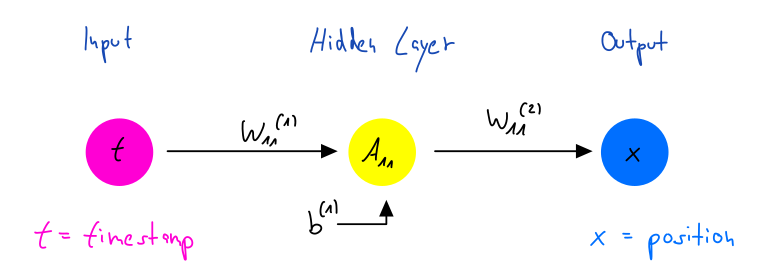

In [5]:
def NeuralNetwork(timestamps, positions):
    model = Sequential()

    model.add(Dense(units=1, input_shape=(1,), use_bias=True)) # Hidden Layer

    model.add(Dense(1)) # Output Layer

    model.summary()
    model.compile('rmsprop', loss='mse', metrics=['mse'])

    h = model.fit(timestamps, positions, epochs=500, verbose=True)

    return model

In [6]:
# Calling function #this is tensorflow
model = NeuralNetwork(scaled_timestamps, positions)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2023-08-14 11:22:27.815474: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-08-14 11:22:27.816105: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/500
45/45 [==============================] - 0s 665us/step - loss: 5.5444 - mse: 5.5444
Epoch 2/500
45/45 [==============================] - 0s 662us/step - loss: 5.1295 - mse: 5.1295
Epoch 3/500
45/45 [==============================] - 0s 596us/step - loss: 4.7721 - mse: 4.7721
Epoch 4/500
45/45 [==============================] - 0s 564us/step - loss: 4.4513 - mse: 4.4513
Epoch 5/500
45/45 [==============================] - 0s 736us/step - loss: 4.1593 - mse: 4.1593
Epoch 6/500
45/45 [==============================] - 0s 568us/step - loss: 3.9031 - mse: 3.9031
Epoch 7/500
45/45 [==============================] - 0s 591us/step - loss: 3.6685 - mse: 3.6685
Epoch 8/500
45/45 [==============================] - 0s 570us/step - loss: 3.4235 - mse: 3.4235
Epoch 9/500
45/45 [==============================] - 0s 563us/step - loss: 3.1666 - mse: 3.1666
Epoch 10/500
45/45 [==============================] - 0s 588us/step - loss: 2.8960 - mse: 2.8960
Epoch 11/500
45/45 [===================

In [11]:
# Make predictions using the trained model
predicted_positions = model.predict(scaled_test_timestamps)
print('actual positions:', positions)
print('predicted_positions: ', predicted_positions)

12/12 [==============================] - 0s 503us/step
actual positions: [0.6123172151341786, 0.6143172104782871, 0.6163172067234639, 0.6183172030478897, 0.6203171994113794, 0.6223171954251284, 0.6243171913988212, 0.6263171865530249, 0.6283171821234855, 0.6303171794072792, 0.6323171767728303, 0.6343171743845278, 0.6363171720776704, 0.6383171699204633, 0.6403171678541053, 0.6423171659966157, 0.6443171641535346, 0.6463171624996591, 0.6483171608280692, 0.6503171593876333, 0.6523171580110146, 0.6543171568022497, 0.6563171557170027, 0.6583171546903894, 0.6603171537380969, 0.6623171529705056, 0.6643171521929044, 0.6663171515575285, 0.6683171510980869, 0.6703171505483724, 0.6723171501868129, 0.6743171499010311, 0.676317149756352, 0.6783171495147334, 0.6803171494945341, 0.6823171495000265, 0.6843171496096495, 0.6863171496538971, 0.6883171498110582, 0.6903171503830465, 0.6923171527185642, 0.6943171567471489, 0.6963171612833983, 0.6983171660693733, 0.7003171712056209, 0.7023171765453962, 0.70431

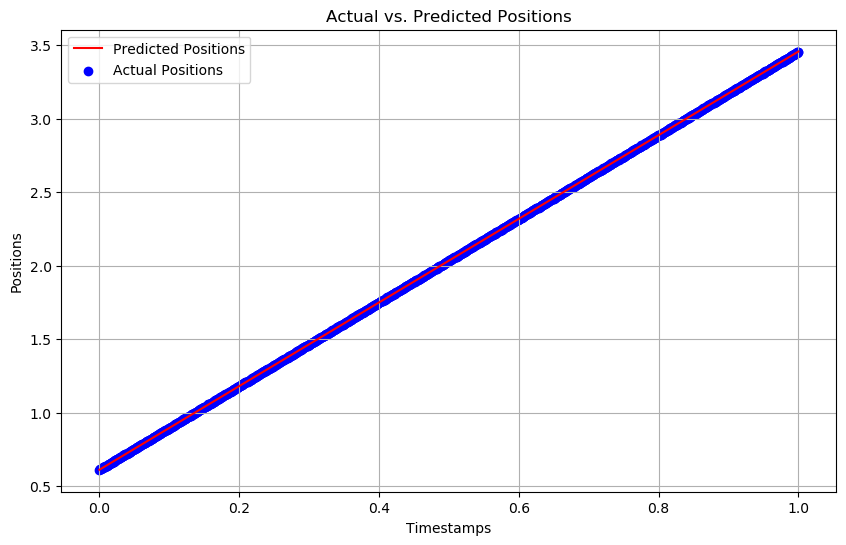

In [15]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(scaled_timestamps, positions, label='Actual Positions', color='blue')
plt.plot(scaled_test_timestamps, predicted_positions, label='Predicted Positions', color='red')
plt.xlabel('Timestamps')
plt.ylabel('Positions')
plt.title('Actual vs. Predicted Positions')
plt.legend()
plt.grid()
plt.show()